In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


df = pd.read_csv("C:/Users/하태권/Downloads/abalone.csv") #데이터 로딩
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [7]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [9]:
columns = ['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

In [13]:
label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [15]:
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,66,56,18,715,417,199,263,14
1,1,2,45,36,17,285,178,94,113,6
2,2,0,81,67,26,962,480,280,374,8
3,3,2,63,56,24,718,400,225,273,9
4,4,1,41,34,15,253,159,76,87,6
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,88,73,32,1289,698,475,442,10
4173,4173,2,93,71,26,1411,832,426,463,9
4174,4174,2,95,78,40,1727,994,571,550,8
4175,4175,0,100,80,29,1610,1005,518,530,9


In [ ]:
df = df.drop(columns=['id'])


In [21]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,66,56,18,715,417,199,263,14
1,2,45,36,17,285,178,94,113,6
2,0,81,67,26,962,480,280,374,8
3,2,63,56,24,718,400,225,273,9
4,1,41,34,15,253,159,76,87,6
...,...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442,10
4173,2,93,71,26,1411,832,426,463,9
4174,2,95,78,40,1727,994,571,550,8
4175,0,100,80,29,1610,1005,518,530,9


In [23]:
df['Rings'].value_counts()

Rings
8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
26      2
23      2
0       1
25      1
27      1
1       1
24      1
Name: count, dtype: int64

In [25]:
X = df.drop('Rings', axis=1).values
y = df['Rings'].values
X

array([[   2,   66,   56, ...,  417,  199,  263],
       [   2,   45,   36, ...,  178,   94,  113],
       [   0,   81,   67, ...,  480,  280,  374],
       ...,
       [   2,   95,   78, ...,  994,  571,  550],
       [   0,  100,   80, ..., 1005,  518,  530],
       [   2,  117,   94, ..., 1461,  732,  813]], dtype=int64)

In [27]:
y

array([14,  6,  8, ...,  8,  9, 11], dtype=int64)

In [29]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 8), (836, 8), (3341,), (836,))

In [31]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

 ACCURACY OF OTHER ML CLASSIFIERS

--- SVM Classifier ---
0.2834928229665072
[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4 10 14  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2 22 14  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 13 36 27 15  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 12 47 42  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7 20 62 35  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 10 38 38 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  8 29 35 19  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3 22 29 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  7 19 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 11 11  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 13  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  9 

In [33]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

 ACCURACY OF OTHER ML CLASSIFIERS

--- SVM Classifier ---
0.2834928229665072
[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4 10 14  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2 22 14  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 13 36 27 15  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 12 47 42  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7 20 62 35  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 10 38 38 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  8 29 35 19  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3 22 29 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  7 19 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 11 11  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 13  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  9 

In [35]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.2069377990430622
[[ 3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  6  8 10  6  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5 11 15  8  1  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 18 30 29 10  3  3  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  8 17 28 22 18 10  0  3  2  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7 28 30 23 15  6  7  0  4  1  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 16 22 23 20  5  6  4  2  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 12 15 23 16  7  6  1  4  0  2  3  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  9 13 11  8  7  2  3  2  3  1  1  2  0  2  0  0  1  0  0]
 [ 0  0  0  0  0  1  7  6  9  3  5  3  1  1  0  1  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  3  2  4  3  5  0  2  1  2  1  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  2  3  0  1  3  2  2 

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.2452153110047847
[[ 1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  7 10  9  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5 17 15  6  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 23 27 33  8  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  2 14 49 24 15  3  1  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8 27 36 34 13  3  2  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5 12 30 29 18  5  3  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  8 31 29 21  0  2  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  9 15 17 12  6  1  2  1  1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  1  2  7  8 12  3  2  2  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7  6  4  3  0  1  2  1  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  5  6  2  0  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 4.846459549508021
평균제곱근오차 4.846459549508021
평균제곱근오차 4.846459549508022


In [61]:
# 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# 모델 초기화
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine": SVR()
}

# 모델 학습
for name, model in models.items():
    model.fit(X_train, y_train)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 모델 성능 저장
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)  # 예측값 생성
    
    # 평가 지표 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # 결과 저장
    results[name] = {"MSE": mse, "RMSE": rmse, "R2 Score": r2}

# 결과 출력
for model, scores in results.items():
    print(f"🔹 {model}")
    print(f"   - MSE: {scores['MSE']:.3f}")
    print(f"   - RMSE: {scores['RMSE']:.3f}")
    print(f"   - R² Score: {scores['R2 Score']:.3f}")
    print("-" * 30)

🔹 Random Forest
   - MSE: 4.639
   - RMSE: 2.154
   - R² Score: 0.571
------------------------------
🔹 Decision Tree
   - MSE: 8.632
   - RMSE: 2.938
   - R² Score: 0.202
------------------------------
🔹 Linear Regression
   - MSE: 4.846
   - RMSE: 2.201
   - R² Score: 0.552
------------------------------
🔹 K-Nearest Neighbors
   - MSE: 5.450
   - RMSE: 2.334
   - R² Score: 0.496
------------------------------
🔹 Support Vector Machine
   - MSE: 4.797
   - RMSE: 2.190
   - R² Score: 0.556
------------------------------


<Figure size 1200x500 with 0 Axes>

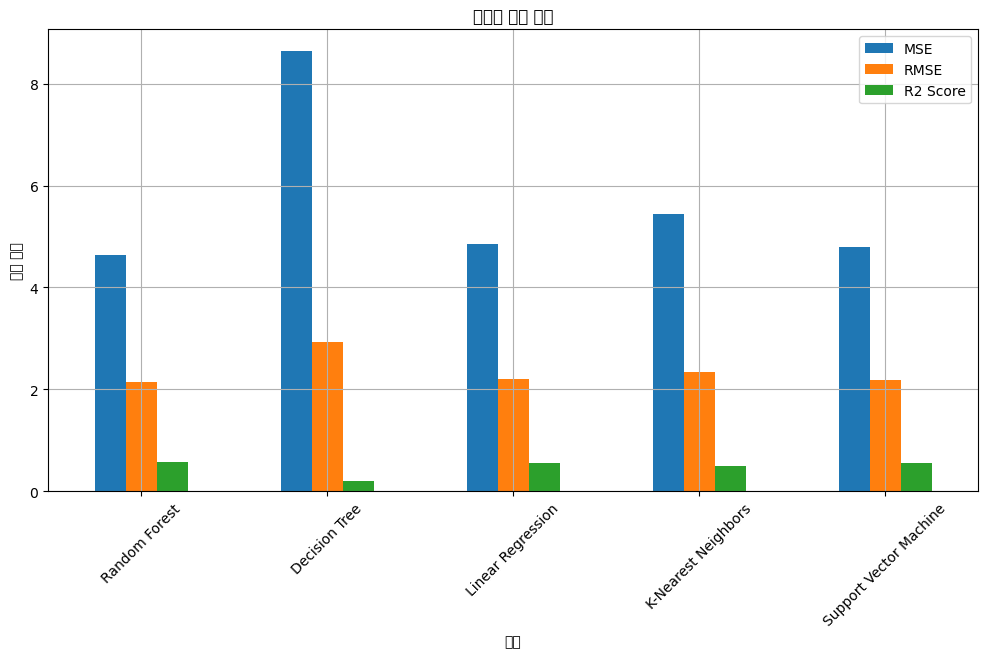

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results).T

# 그래프 그리기
plt.figure(figsize=(12, 5))
results_df[['MSE', 'RMSE', 'R2 Score']].plot(kind='bar', figsize=(12, 6))
plt.title("모델별 성능 비교")
plt.xlabel("모델")
plt.ylabel("성능 지표")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.grid()
plt.show()

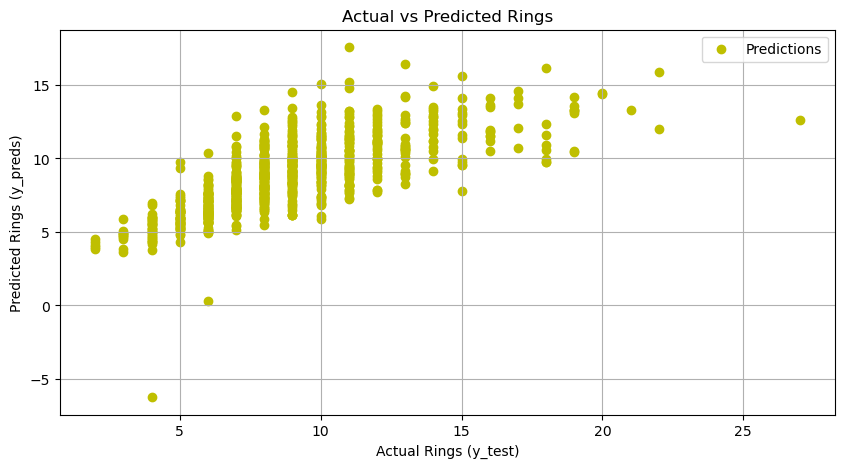

In [67]:
# 예측값 생성 (선형 회귀 모델 사용)
y_preds = models["Linear Regression"].predict(X_test)

# 산점도 그리기
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_preds, c='y', label='Predictions')  # 실제값 vs 예측값
plt.xlabel("Actual Rings (y_test)")
plt.ylabel("Predicted Rings (y_preds)")
plt.title("Actual vs Predicted Rings")
plt.legend()
plt.grid()
plt.show()